EDA Analysis

In [ ]:
import pandas as pd


# Load the data
df = pd.read_json('E:\CAPSTONE\Conversational Job Recommendation System\Realtime_Jobs_Data.json')

# View the first five rows
df.head()

<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
C:\Users\User\AppData\Local\Temp\ipykernel_19500\2289664841.py:4: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_json('E:\CAPSTONE\Conversational Job Recommendation System\Realtime_Jobs_Data.json')


,test,JobId,JobFound,error,CompnayName,JobTitle,PostedOn,Deadline,DeadlineDB,JobVacancies,...,ProUser,ApplicantMatchingScore,CategoryID,C2C,MobileNo,CONFIDENTIAL,NewspaperJob,Closed,ApplyRedirectUrl,AccessibilityAware
0,1,1436370,True,0,RK Supply Ltd.,Data Analyst / Accounts Officer,"Dec 6, 2025","Dec 31, 2025",12/31/2025 00:00:00,6,...,0,0,8,0,,,False,0,//mybdjobs.bdjobs.com/mybdjobs/signin.asp?c7`6...,[]
1,1,1437042,True,0,Pridesys IT Limited,Processor/Senior Processor,"Dec 6, 2025","Jan 5, 2026",01/05/2026 00:00:00,2,...,0,0,8,0,,,False,0,//mybdjobs.bdjobs.com/mybdjobs/signin.asp?a4]7...,[]
2,1,1437039,True,0,Aalok Healthcare & Hospital,Assistant Manager (Customer Care / Admin),"Dec 6, 2025","Dec 26, 2025",12/26/2025 00:00:00,4,...,0,0,11,0,,,False,0,//mybdjobs.bdjobs.com/mybdjobs/signin.asp?3_7a...,[{'Name': 'Do you have Disability Inclusion Po...
3,1,1436999,True,0,Eureka food and beverage,Sales Representative (SR),"Dec 6, 2025","Jan 5, 2026",01/05/2026 00:00:00,--,...,0,0,84,0,,,False,0,//mybdjobs.bdjobs.com/mybdjobs/signin.asp?`9_6...,[]
4,1,1437032,True,0,Rancon Holdings Limited,Sales Hero (Sales Executive - Freshers) RANGS ...,"Dec 6, 2025","Dec 31, 2025",12/31/2025 00:00:00,20,...,0,0,9,0,,,False,0,//mybdjobs.bdjobs.com/mybdjobs/signin.asp?3\7[...,[]


test                  0
JobId                 0
JobFound              0
error                 0
CompnayName           0
                     ..
CONFIDENTIAL          0
NewspaperJob          0
Closed                0
ApplyRedirectUrl      0
AccessibilityAware    0
Length: 70, dtype: int64


Matplotlib is building the font cache; this may take a moment.


<Axes: >

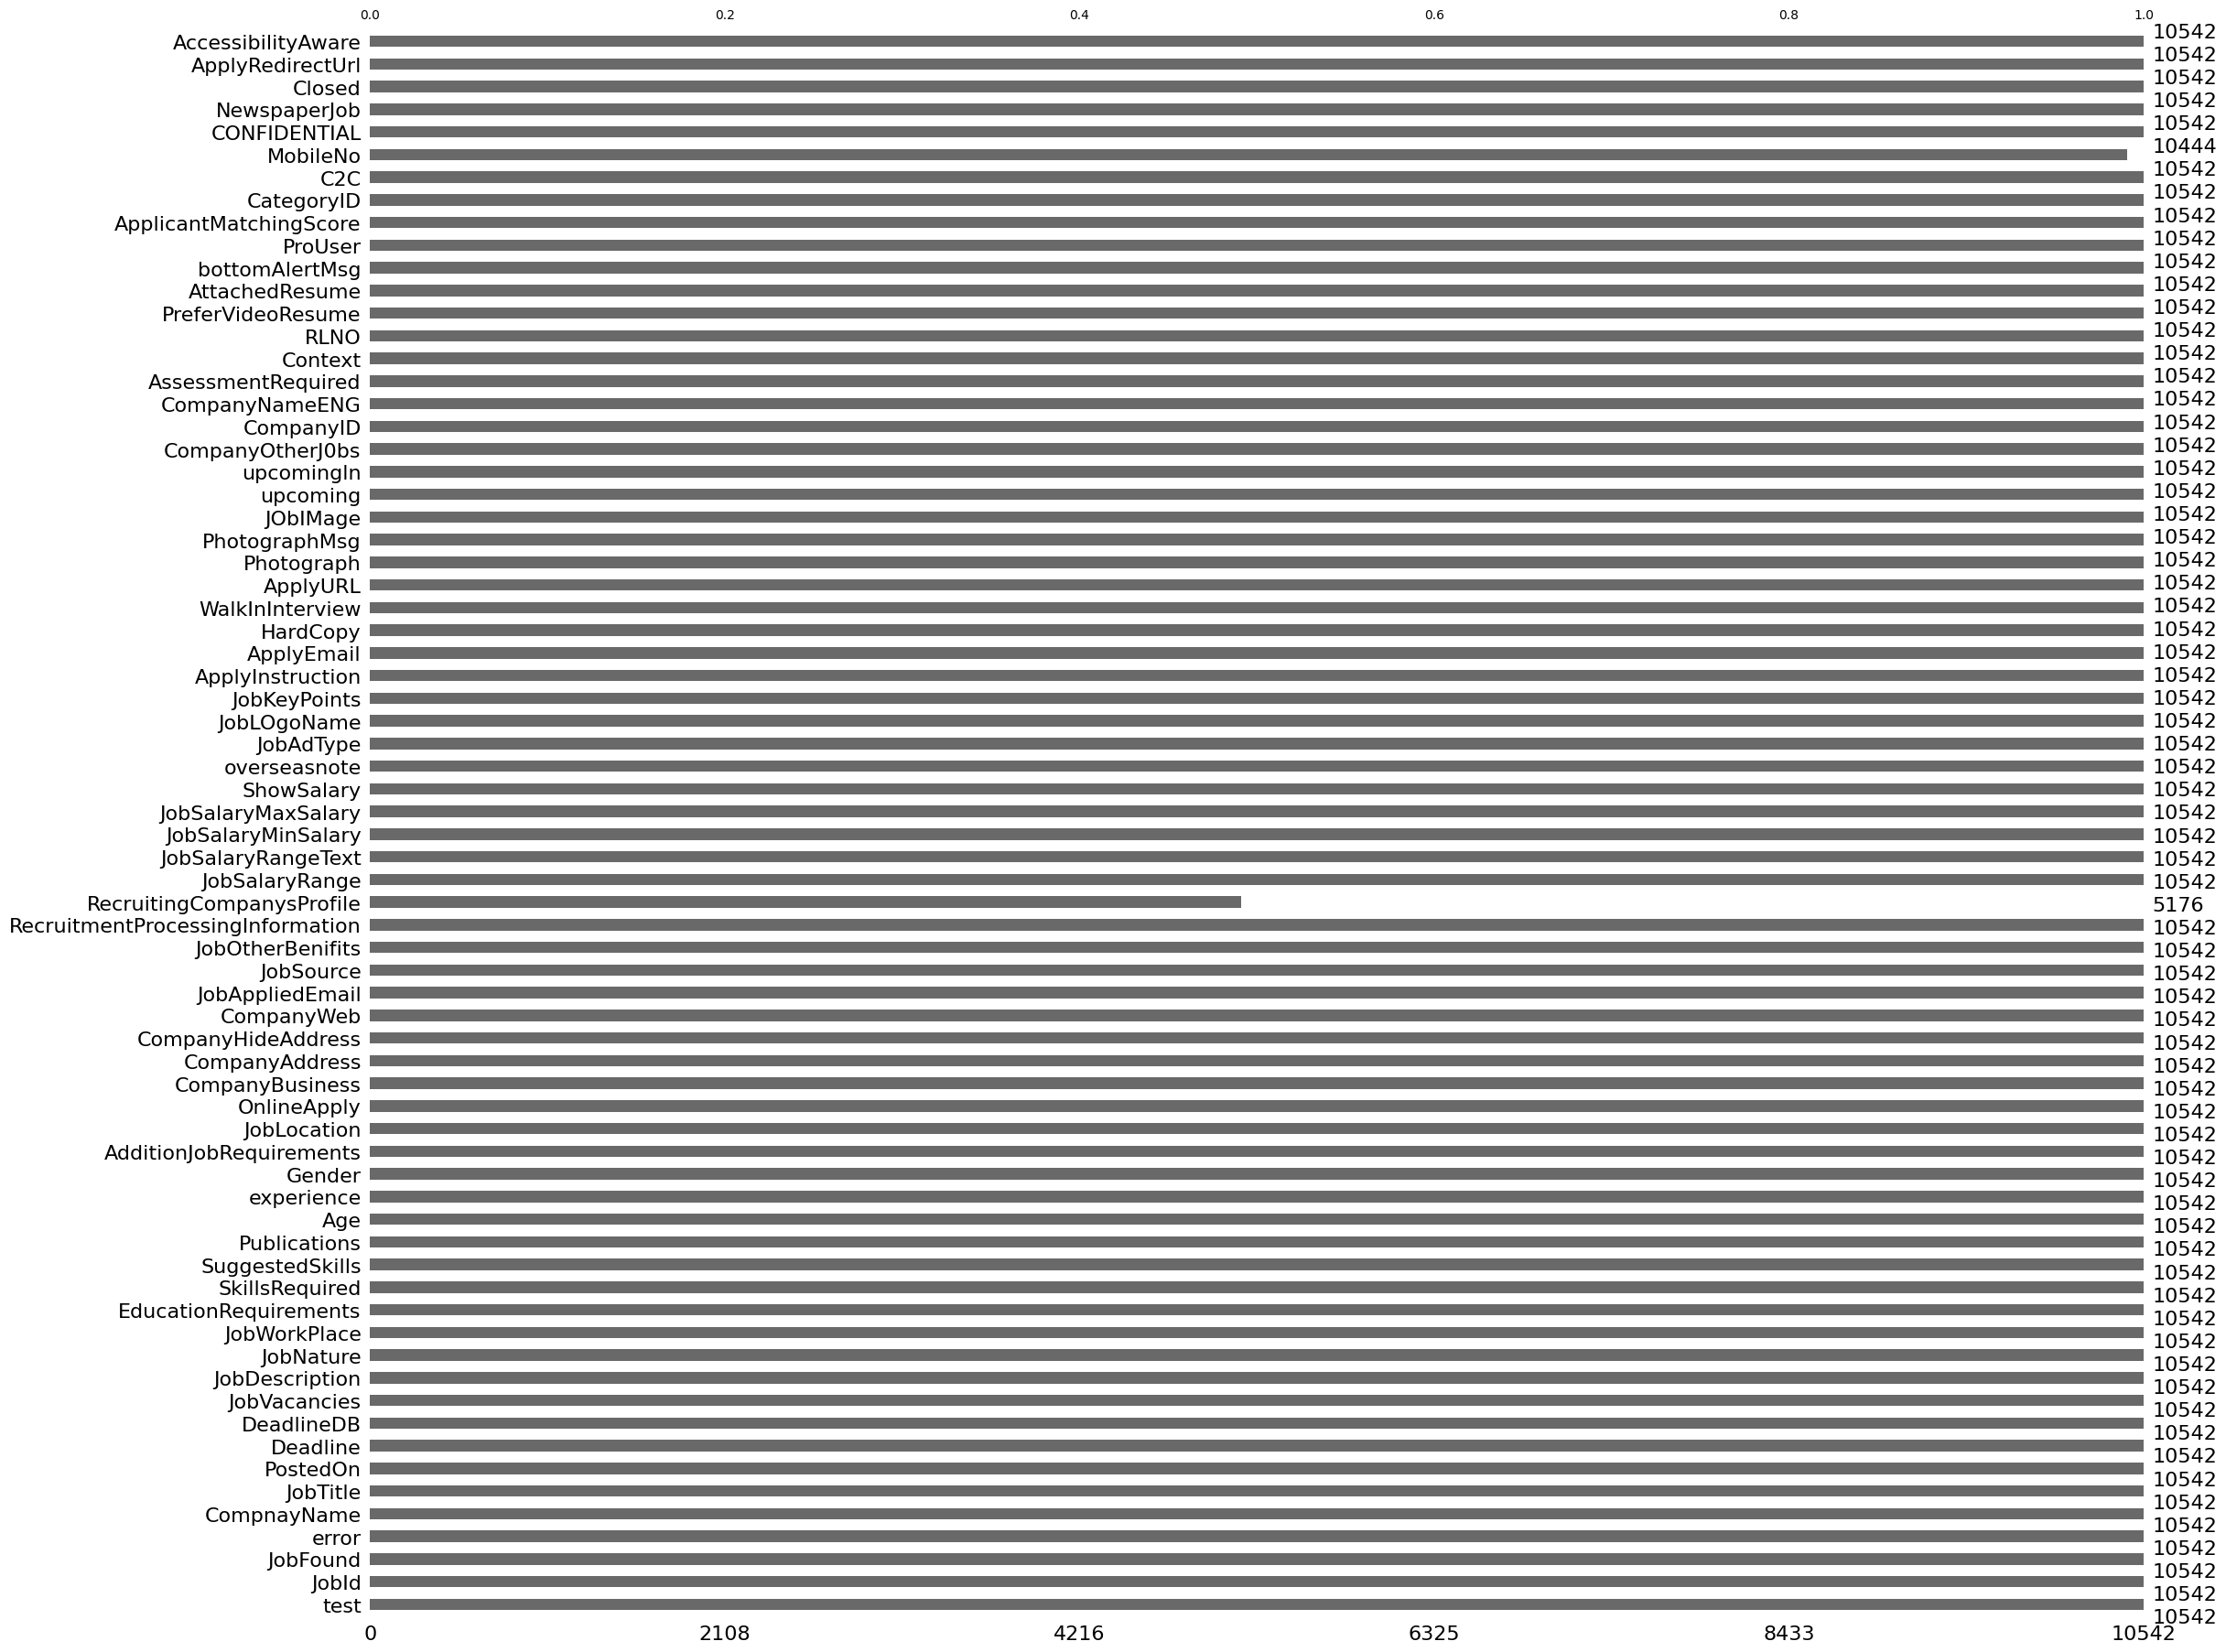

In [6]:
print(df.isnull().sum())

import missingno as msno
msno.bar(df)

In [13]:
# Create a summary table of all features
feature_info = pd.DataFrame({
    'Column Name': df.columns,
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    # We use .apply(lambda x: str(x)) to handle the list columns
    'Unique Values': df.apply(lambda x: x.map(str).nunique()), 
    'Missing Values': df.isnull().sum()
}).reset_index(drop=True)

# Display the whole list
print(feature_info.to_string())

                         Column Name Data Type  Non-Null Count  Unique Values  Missing Values
0                               test     int64           10542              3               0
1                              JobId     int64           10542          10511               0
2                           JobFound    object           10542              1               0
3                              error     int64           10542              1               0
4                        CompnayName    object           10542           5099               0
5                           JobTitle    object           10542           8156               0
6                           PostedOn    object           10542            167               0
7                           Deadline    object           10542            206               0
8                         DeadlineDB    object           10542            232               0
9                       JobVacancies    object           105

In [14]:
import pandas as pd
import json

# 1. Load your JSON dataset
# Replace 'your_dataset.json' with the actual path to your file
try:
    # Most common format: A list of records [{}, {}, {}]
    df = pd.read_json('E:\CAPSTONE\Conversational Job Recommendation System\Realtime_Jobs_Data.json')
except ValueError:
    # Fallback: If JSON is nested (e.g., {"jobs": [...]}), load it manually
    with open('your_dataset.json', 'r', encoding='utf-8') as f:
        data = json.load(f)
    # If data is a dict with a specific key, e.g., data['result'], use: df = pd.DataFrame(data['result'])
    df = pd.DataFrame(data) 

print(f"Original Data Shape: {df.shape}")

# 2. Define lists of columns to drop (Same strategy as before)

# List A: Constant columns & Administrative flags
constant_and_admin_cols = [
    'test', 'JobFound', 'error', 'Publications', 'RecruitmentProcessingInformation',
    'upcoming', 'upcomingln', 'AssessmentRequired', 'Context', 'AttachedResume',
    'bottomAlertMsg', 'ProUser', 'ApplicantMatchingScore', 'Closed', 
    'RecruitingCompanysProfile', 'overseasnote', 'ShowSalary', 'JobAdType',
    'C2C', 'CONFIDENTIAL', 'NewspaperJob', 'AccessibilityAware'
]

# List B: Unique IDs, URLs, and Media
ids_urls_media_cols = [
    'JobId', 'ApplyRedirectUrl', 'ApplyURL', 'JobLOgoName', 
    'JObIMage', 'Photograph', 'PhotographMsg', 'RLNO', 
    'CompanyID', 'CompanyOtherJ0bs', 'JobSource'
]

# List C: PII & Contact Details
contact_cols = [
    'MobileNo', 'ApplyEmail', 'JobAppliedEmail', 
    'CompanyAddress', 'CompanyWeb', 'HardCopy', 
    'WalkInInterview', 'ApplyInstruction'
]

# Combine all lists
cols_to_drop = constant_and_admin_cols + ids_urls_media_cols + contact_cols

# 3. Drop the columns
df_cleaned = df.drop(columns=cols_to_drop, errors='ignore')

# 4. Handle Specific Data formatting
# Convert experience to string (often mixed types in JSON)
if 'experience' in df_cleaned.columns:
    df_cleaned['experience'] = df_cleaned['experience'].astype(str)

# 5. Review the Result
print(f"Cleaned Data Shape: {df_cleaned.shape}")
print("-" * 30)
print("Remaining Columns (Features for Training):")
print(df_cleaned.columns.tolist())

# Show first 3 rows
print("-" * 30)
print(df_cleaned.head(3))

<>:8: SyntaxWarning: invalid escape sequence '\C'
<>:8: SyntaxWarning: invalid escape sequence '\C'
C:\Users\User\AppData\Local\Temp\ipykernel_19500\3260546370.py:8: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_json('E:\CAPSTONE\Conversational Job Recommendation System\Realtime_Jobs_Data.json')


Original Data Shape: (10542, 70)
Cleaned Data Shape: (10542, 29)
------------------------------
Remaining Columns (Features for Training):
['CompnayName', 'JobTitle', 'PostedOn', 'Deadline', 'DeadlineDB', 'JobVacancies', 'JobDescription', 'JobNature', 'JobWorkPlace', 'EducationRequirements', 'SkillsRequired', 'SuggestedSkills', 'Age', 'experience', 'Gender', 'AdditionJobRequirements', 'JobLocation', 'OnlineApply', 'CompanyBusiness', 'CompanyHideAddress', 'JobOtherBenifits', 'JobSalaryRange', 'JobSalaryRangeText', 'JobSalaryMinSalary', 'JobSalaryMaxSalary', 'JobKeyPoints', 'CompanyNameENG', 'PreferVideoResume', 'CategoryID']
------------------------------
                   CompnayName                                   JobTitle  \
0               RK Supply Ltd.            Data Analyst / Accounts Officer   
1          Pridesys IT Limited                 Processor/Senior Processor   
2  Aalok Healthcare & Hospital  Assistant Manager (Customer Care / Admin)   

      PostedOn      Deadline

In [15]:
df_cleaned

,CompnayName,JobTitle,PostedOn,Deadline,DeadlineDB,JobVacancies,JobDescription,JobNature,JobWorkPlace,EducationRequirements,...,CompanyHideAddress,JobOtherBenifits,JobSalaryRange,JobSalaryRangeText,JobSalaryMinSalary,JobSalaryMaxSalary,JobKeyPoints,CompanyNameENG,PreferVideoResume,CategoryID
0,RK Supply Ltd.,Data Analyst / Accounts Officer,"Dec 6, 2025","Dec 31, 2025",12/31/2025 00:00:00,6,"<p><strong><span style=""color:rgb(51, 51, 51);...",Full Time,Work at office,<ul><ul><li>Bachelor of Business Administratio...,...,True,,Tk. 20000 - 35000 (Monthly),,20000,35000,"<p><strong><span style=""color:rgb(51, 51, 51)""...",RK Supply Ltd.,0,8
1,Pridesys IT Limited,Processor/Senior Processor,"Dec 6, 2025","Jan 5, 2026",01/05/2026 00:00:00,2,<ul><li>Review property preservation work orde...,Full Time,Work at office,<ul><ul><li>Bachelor/Honors</li></ul></ul>,...,False,<ul><li>Salary Review: Yearly</li><li>Festival...,Negotiable,,0,0,,Pridesys IT Limited,0,8
2,Aalok Healthcare & Hospital,Assistant Manager (Customer Care / Admin),"Dec 6, 2025","Dec 26, 2025",12/26/2025 00:00:00,4,<h3>Shift Management and Operational Leadershi...,Full Time,Work at office,<ul><ul><li>Masters</li></ul></ul>,...,False,<ul><li>Provident fund</li><li>Salary Review: ...,--,,0,0,,Aalok Healthcare & Hospital,1,11
3,Eureka food and beverage,Sales Representative (SR),"Dec 6, 2025","Jan 5, 2026",01/05/2026 00:00:00,--,<p><strong>দায়িত্ব ও কর্তব্য:</strong></p><ul...,Full Time,,<ul><ul><li>SSC</li><li>HSC</li><li>Bachelor/H...,...,False,<ul><ul><li><p>অন্যান্য সুবিধা: আলোচনা সাপেক্ষ...,Tk. 18000 - 22000 (Monthly),,18000,22000,,Eureka food and beverage,1,84
4,Rancon Holdings Limited,Sales Hero (Sales Executive - Freshers) RANGS ...,"Dec 6, 2025","Dec 31, 2025",12/31/2025 00:00:00,20,<ul><li>Greet and assist walk-in customers wit...,Full Time,Work at office,<ul><ul><li>Bachelor/Honors</li></ul></ul>,...,False,"<ul><li>T/A,Mobile bill,Performance bonus</li>...",Tk. 20000 - 20000 (Monthly),,20000,20000,,Rancon Holdings Limited,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10537,BrandEdge Communication Ltd.,Strategic Planner,"Dec 23, 2025","Jan 22, 2026",2026-01-22,1,"<p><strong style=""color: rgb(106, 115, 129);"">...",Full Time,Work at office,<ul><li>Bachelor/Honors</li></ul>,...,False,,Negotiable,Negotiable,0,0,,BrandEdge Communication Ltd.,1,0
10538,Marine Electronics Service; (A Group Nautika ...,Sales Executive,"Dec 23, 2025","Jan 22, 2026",2026-01-22,--,<p>Marine Electronics Service is seeking young...,Full Time,,<ul><li>Bachelor of Science (BSc) in Electrica...,...,True,"<ul><ul><li><p>Salary: BDT 22,000 - 25,000 (ba...",Tk. 22000 - 25000 (Monthly),Tk. 22000 - 25000 (Monthly),22000,25000,,Marine Electronics Service; (A Group Nautika ...,0,0
10539,PLAYD8 LTD,SEO and Digital Content Specialist,"Dec 23, 2025","Jan 22, 2026",2026-01-22,1,<p>PlayD8 Ltd is seeking a tech-savvy and crea...,Full Time,Work from home,<ul><li>Bachelor of Science (BSc) in Computer ...,...,False,,Tk. 35000 - 50000 (Monthly),Tk. 35000 - 50000 (Monthly),35000,50000,,PLAYD8 LTD,1,0
10540,BrandEdge Communication Ltd.,2D & 3D Designer - Event Activation,"Dec 23, 2025","Jan 22, 2026",2026-01-22,2,<p></p>,Full Time,Work at office,<ul><li>Bachelor of Fine Arts (B.F.A) (Optiona...,...,False,,Negotiable,Negotiable,0,0,,BrandEdge Communication Ltd.,0,0


In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10542 entries, 0 to 10541
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CompnayName              10542 non-null  object
 1   JobTitle                 10542 non-null  object
 2   PostedOn                 10542 non-null  object
 3   Deadline                 10542 non-null  object
 4   DeadlineDB               10542 non-null  object
 5   JobVacancies             10542 non-null  object
 6   JobDescription           10542 non-null  object
 7   JobNature                10542 non-null  object
 8   JobWorkPlace             10542 non-null  object
 9   EducationRequirements    10542 non-null  object
 10  SkillsRequired           10542 non-null  object
 11  SuggestedSkills          10542 non-null  object
 12  Age                      10542 non-null  object
 13  experience               10542 non-null  object
 14  Gender                   10542 non-nul

Word Clouds & Common Phrases

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2488 (\N{BENGALI LETTER SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2489 (\N{BENGALI LETTER HA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2453 (\N{BENGALI LETTER KA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) 

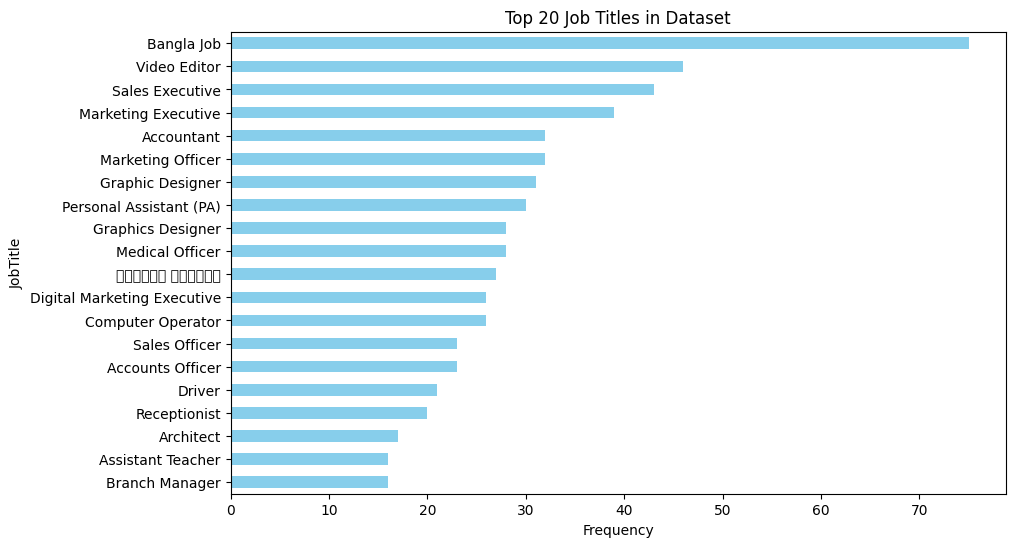

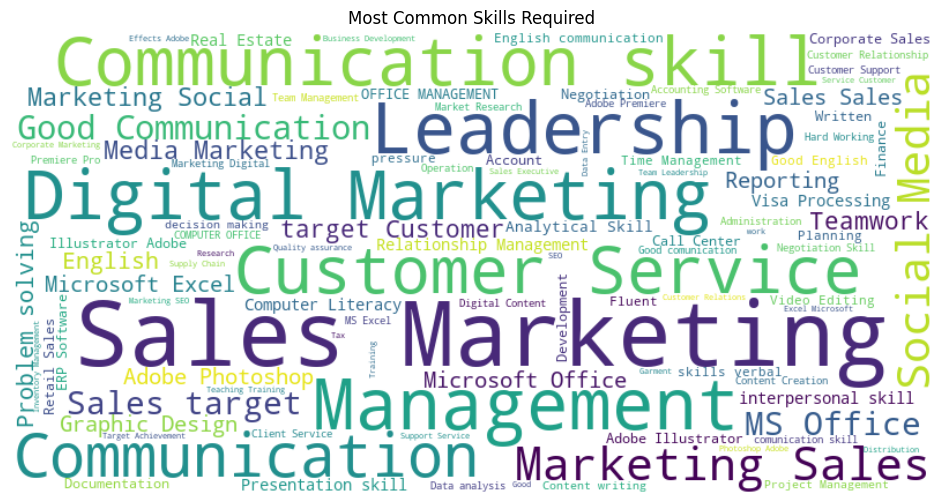

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# 1. Visualize Top Job Titles
plt.figure(figsize=(10, 6))
df_cleaned['JobTitle'].value_counts().head(20).plot(kind='barh', color='skyblue')
plt.title('Top 20 Job Titles in Dataset')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()
plt.show()

# 2. Word Cloud for Skills (Crucial for Matching)
# We join all text in the SkillsRequired column
skills_text = " ".join(df_cleaned['SkillsRequired'].fillna('').astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      colormap='viridis', max_words=100).generate(skills_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Skills Required')
plt.show()

Filter Distribution 

C:\Users\User\AppData\Local\Temp\ipykernel_19500\3421557190.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='JobNature', palette='Set2')


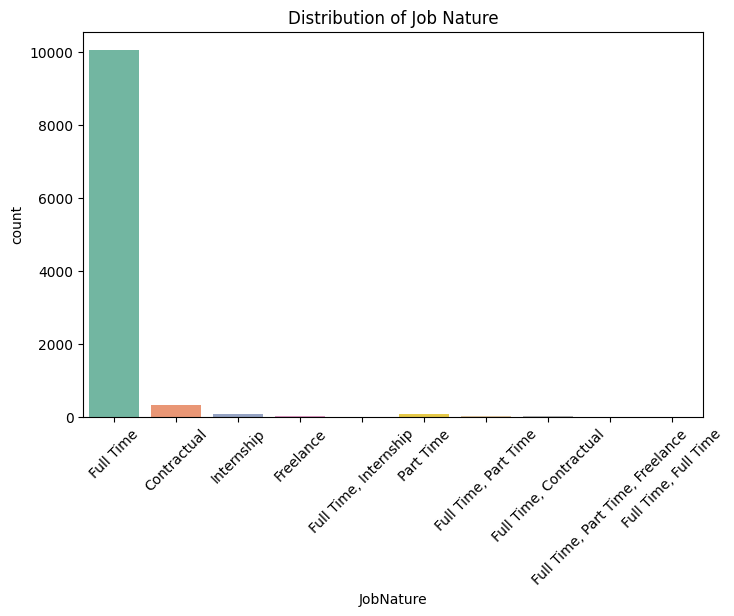

Salary Disclosure Rate:
HasSalary
Hidden/Negotiable    72.528932
Disclosed            27.471068
Name: proportion, dtype: float64


In [19]:
# 3. Analyze Job Nature (Full-time, Part-time, etc.)
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='JobNature', palette='Set2')
plt.title('Distribution of Job Nature')
plt.xticks(rotation=45)
plt.show()

# 4. Analyze Salary Presence
# Since a bot needs to answer "What is the salary?", check how many records have it
df_cleaned['HasSalary'] = df_cleaned['JobSalaryMaxSalary'].apply(lambda x: 'Disclosed' if x > 0 else 'Hidden/Negotiable')
print("Salary Disclosure Rate:")
print(df_cleaned['HasSalary'].value_counts(normalize=True) * 100)

Description Length

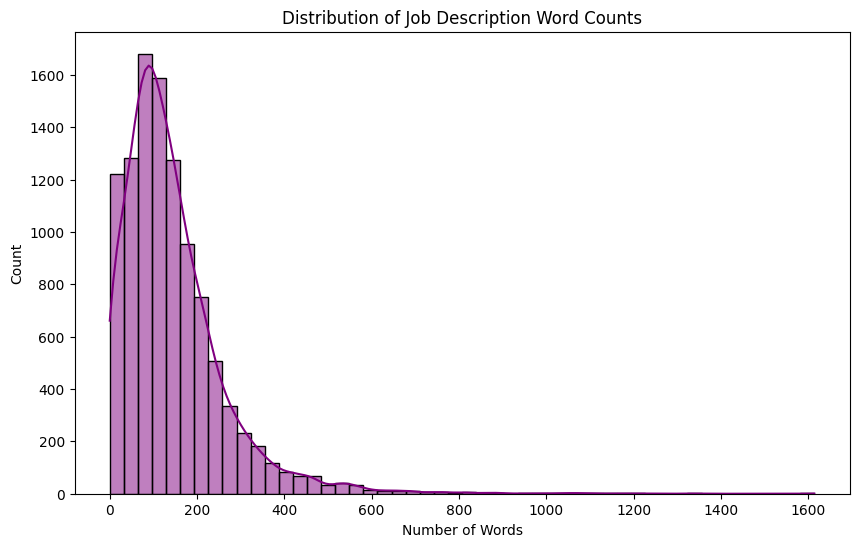

In [20]:
# 5. Distribution of Description Length
df_cleaned['Desc_Length'] = df_cleaned['JobDescription'].fillna('').apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Desc_Length'], bins=50, kde=True, color='purple')
plt.title('Distribution of Job Description Word Counts')
plt.xlabel('Number of Words')
plt.show()